<a href="https://colab.research.google.com/github/AndyVi98/Partnership/blob/main/Matplotlib_and_Bokeh_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic plotting with pandas and Matplotlib

As we're now familiar with some of the features of [pandas](https://pandas.pydata.org/), we will wade into visualizing our data in Python using the built-in plotting options available directly in pandas. Much like the case of pandas being built upon [NumPy](https://numpy.org/), plotting in pandas takes advantage of plotting features from the [Matplotlib](https://matplotlib.org/) plotting library. Plotting in pandas provides a basic framework for visualizing our data, but as you'll see we will sometimes need to also use features from Matplotlib to enhance our plots. In particular, we will use features from the the `pyplot` module in Matplotlib, which provides [MATLAB](https://www.mathworks.com/products/matlab.html)-like plotting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Input data

In the lesson this week we are using the same weather data from [Exercise 5](https://github.com/NIGS-GeoPython-2022/exercise-5).  We'll focus on weather observation station data from Mactan International Airport.


## Getting started

Let's start by importing Pandas and reading our data file.

In [ ]:
import pandas as pd

```{admonition} Datetime in Python
For the lesson this week we will be using a datetime index for our weather observations.
We did not cover the datetime data type in detail in Lesson 6, but you can find [a brief introduction to datetime in the Lesson 6 materials](https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#datetime-optional-for-lesson-6).
```

Just as we did last week, we'll read our data file by passing a few parameters to the Pandas `read_csv()` function. In this case, however, we'll include a few additional parameters in order to read the data with a *datetime index*. Let's read the data first, then see what happened.

In [ ]:
fp = r"drive/Shareddrives/GDAnotebooks/data/ph_tempdata.csv"

data = pd.read_csv(
    fp,
    na_values=["***"],
    usecols=["DATE", "STATION", "TEMP", "MAX", "MIN"],
    parse_dates=["DATE"],
    index_col="DATE",
)

# convert temperatures from Farenheit to Celsius
data["TEMP"] = (data["TEMP"] - 32)/1.8
data["MAX"] = (data["MAX"] - 32)/1.8
data["MIN"] = (data["MIN"] - 32)/1.8

data = data.loc[data["STATION"] == "RPM00098646"]


So what's different here? Well, we have added two new parameters: `parse_dates` and `index_col`.

- `parse_dates` takes a Python list of column name(s) containing date data that Pandas will parse and convert to the *datetime* data type. For many common date formats this parameter will automatically recognize and convert the date data.
- `index_col` is used to state a column that should be used to index the data in the DataFrame. In this case, we end up with our date data as the DataFrame index. This is a very useful feature in Pandas as we'll see below.

Having read in the data, let's have a quick look at what we have using `data.head()`.

In [ ]:
data.head()

,STATION,TEMP,MAX,MIN
DATE,,,,
2017-01-01,RPM00098646,26.5,30.0,NaN
2017-01-02,RPM00098646,26.6,29.8,NaN
2017-01-03,RPM00098646,28.0,31.4,24.8
2017-01-04,RPM00098646,27.8,31.8,NaN
2017-01-05,RPM00098646,27.4,31.4,25.0


As mentioned above, you can now see that the index column for our DataFrame (the first column) contains date values related to each row in the DataFrame.

## Basic x-y plot

Now we're ready for our first plot. We can start by using the basic line plot in Pandas to look at our temperature data.

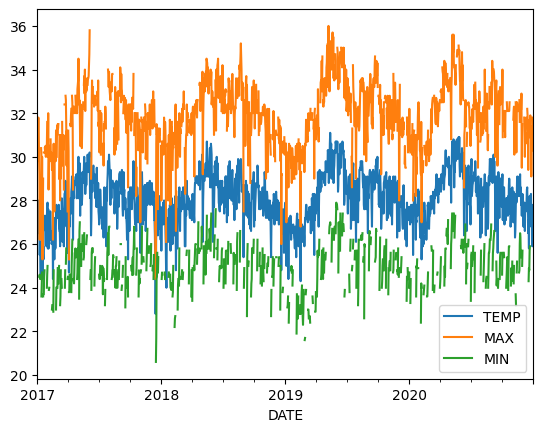

In [ ]:
ax = data.plot()

If all goes well, you should see the plot above.

OK, so what happened here?

1. We first created the plot object using the `plot()` method of the `data` DataFrame. Without any parameters given, this makes the plot of all columns in the DataFrame as lines of different color on the y-axis with the index, time in this case, on the x-axis.
2. In case we want to be able to modify the plot or add anything, we assign the plot object to the variable `ax`. We can check its type below.

In fact, let's check the type of the `ax` variable now.

In [ ]:
type(ax)

matplotlib.axes._axes.Axes

OK, so it looks like we have some kind of plot data type that is part of Matplotlib. Clearly, pandas is using Matplotlib for generating our plots.

### Selecting our plotted data

Now, let's make a few small changes to our plot and plot the data again. First, let's only plot the observed temperatures in the `data['TEMP']` column, and let's restrict ourselves to observations from the month of January 2017 (the first month in the dataset). We can do this by selecting the desired data column and date range first, then plotting our selection.

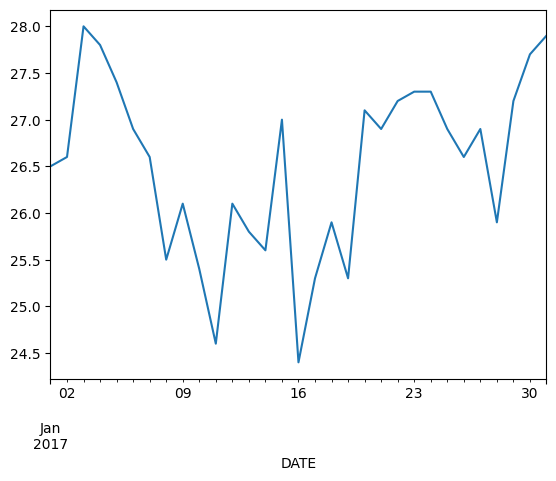

In [ ]:
jan2017_temps = data["TEMP"].loc[data.index <= "20170131"]
ax = jan2017_temps.plot()

So, what did we change?

1. Well, we selected only the `'TEMP'` column now by using `data['TEMP']` instead of `data`.
2. We've added a restriction to the date range using `loc[]` to select only rows where the index value `data.index` is less than or equal to `'2017-01-31`. In that case, the number in the string is in the format `'YYYY-MM-DD'`, where `YYYY` is the year, `MM` is the month, `DD` is the day.
3. By saving this selection to the DataFrame `jan2017_temps` we're able to now use `jan2017_temps.plot()` to plot only our selection. This is cool, but we can do even better...

## Basic plot formatting

We can make our plot look a bit nicer and provide more information by using a few additional plotting options to pandas/Matplotlib.

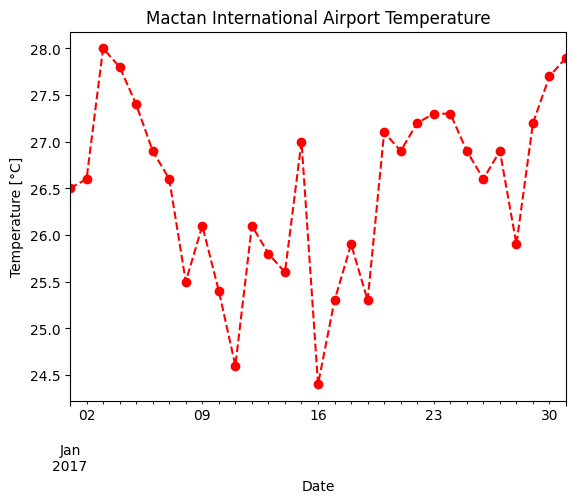

In [ ]:
# Change line and symbol format, and add axis labels/title
ax = jan2017_temps.plot(
    style="ro--",
    title="Mactan International Airport Temperature",
    xlabel="Date",
    ylabel="Temperature [°C]",
)

Now we see our temperature data as a red dashed line with circles showing the data points.
This comes from the additional `style='ro--'` used with `jan2017_temps.plot()`.
In this case, `r` tells the `jan2017_temps.plot()` function to use red color for the lines and symbols, `o` tells it to show circles at the points, and `--` says to use a dashed line.
You can use `help(jan2017_temps.plot)` to find out more about formatting plots or have a look at the [documentation on the pandas website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html#pandas.DataFrame.plot.line).
We have also added a title using the `title` parameter, and axis labels using the `xlabel` and `ylabel` parameters.

In [ ]:
help(jan2017_temps.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      -

### Embiggening\* the plot

While the plot sizes we're working with are OK, it would be nice to have them displayed a bit larger.
Fortunately, there is an easy way to make the plots larger in pandas/Matplotlib.
We can simply add the `figsize` parameter with the desired figure size listed as a tuple (a set of values in normal parentheses) that lists the width and height of the figure (in inches!).

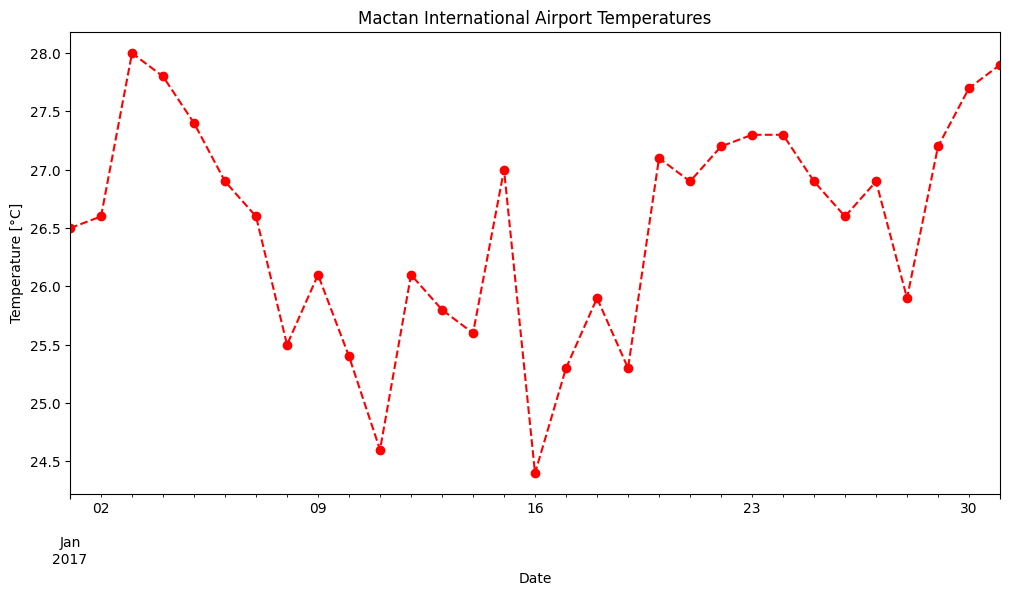

In [ ]:
# Adjust the figure size
ax = jan2017_temps.plot(
    style="ro--",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6)
)

The cell above sets the default plot size to be 12 inches wide by 6 inches tall.
Feel free to change these values if you prefer.

```{note}
It is also possible to change the default figure size for all figures in a Jupyter Notebook by importing the pyplot module from matplotlib (i.e., `import matplotlib.pyplot as plt`)and then defining the default figure size using `plt.rcParams['figure.figsize'] = [12, 6]`. In this case the figure size should be given as a Python list.
```

\* To [embiggen](https://www.lexico.com/definition/embiggen) means to enlarge.
It's a perfectly [cromulent](https://www.lexico.com/definition/cromulent) word.

### Other common plot formatting operations

#### Adding text to the plot

Adding text to plots can be done using `ax.text()`.

```python
ax.text(x, y, 'Text to display')
```

This would display "Text to display" at the location *x*, *y* on the plot.
We'll see how to do this in a live example in just a second.

#### Changing the axis ranges

Changing the plot axes can be done using the `xlim` and `ylim` parameters of the `plot()` function

```python
df.plot(xlim=[xmin, xmax], ylim=[ymin, ymax])
```

where `xmin` should be the minimum bound of the x-axis, `xmax` should be the maximum bound, and the same goes for the y-axis with `ymin` and `ymax`.

#### Dealing with datetime axes

One issue we will encounter with both placing text on the plot and changing the axis ranges is our datetime index for our DataFrame. In order to do either thing, we need to define x-values using a datetime object. The easiest way to do this is to use the Pandas `pd.to_datetime()` function, which converts a character string date to a datetime object. For example, we can convert January 1, 2017 from the character string `'20170117'` to a datetime equivalent by typing

In [ ]:
pd.to_datetime("20170117")  # different format but pandas still udnerstands... makes life easier

Timestamp('2017-01-17 00:00:00')

With this datetime issue in mind, let's now consider a modified version of the plot above, we can

1. Limit our time range to Jan 1 to 15, 2017
2. Only look at temperatures between 20-26° Celsius
3. Add text to note the warmest day.

Text(2017-01-03 00:00:00, 28.0, '<- Warmest day in Jan 2017')

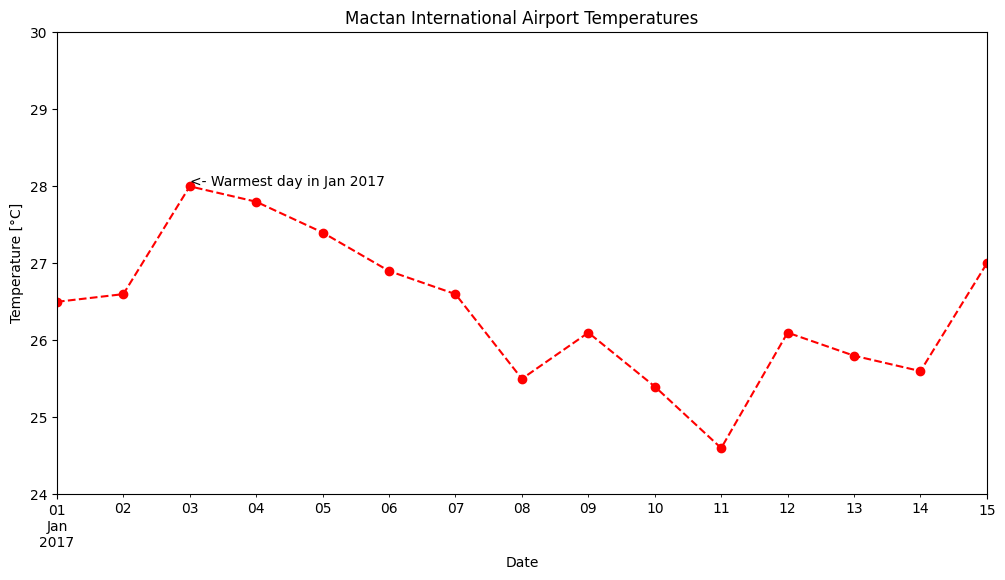

In [ ]:
# Define the start, end, and cold times
start_time = pd.to_datetime("2017-01-01")
end_time = pd.to_datetime("2017-01-15")
warm_day = pd.to_datetime("2017-01-03")

# Create the plot, including the axis limits
ax = jan2017_temps.plot(
    style="ro--",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[24., 30.0],
)

# Add text to display the coldest temperature
ax.text(warm_day, 28.0, "<- Warmest day in Jan 2017")

### Check your understanding

Create a line plot similar to our examples above with the following attributes:
    
- Temperature data from January 9 to 23, 2017
- A dotted black line connecting the observations (do not show the data points)
- A title that reads "Mid-January 2017 Temperature"
- A text label indicating the coldest day in January 2017

Text(2017-01-16 00:00:00, 24.4, '<-- Coldest day in Jan 2017')

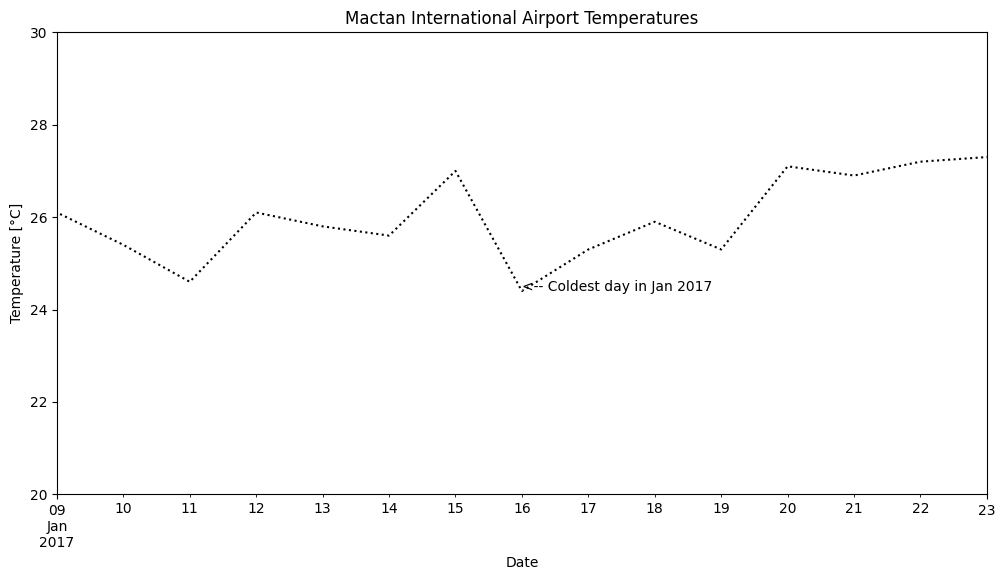

In [ ]:
# Solution
# Define start, end, and cold times
start_time = pd.to_datetime("2017-01-09")
end_time = pd.to_datetime("2017-01-23")
cold_day = pd.to_datetime("2017-01-16")

# Create the plot, including the axis limits

ax = jan2017_temps.plot(
    style="k:",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    xlim=[start_time, end_time],
    ylim=[20.0, 30.0],
)

# Display text on plot
ax.text(cold_day, jan2017_temps.min(), "<-- Coldest day in Jan 2017")

## Bar plots in pandas

In addition to line plots, there are many other options for plotting in pandas. Bar plots are one option, which can be used quite similarly to line plots with the addition of the `kind=bar` parameter. Note that it is easiest to plot our selected time range for a bar plot by selecting the dates in our data series first, rather than adjusting the plot limits. pandas sees bar plot data as categorical, so the date range is more difficult to define for x-axis limits. For the y-axis, we can still define its range using the `ylim=[ymin, ymax]` parameter. Similarly, text placement on a bar plot is more difficult, and most easily done using the index value of the bar where the text should be placed.

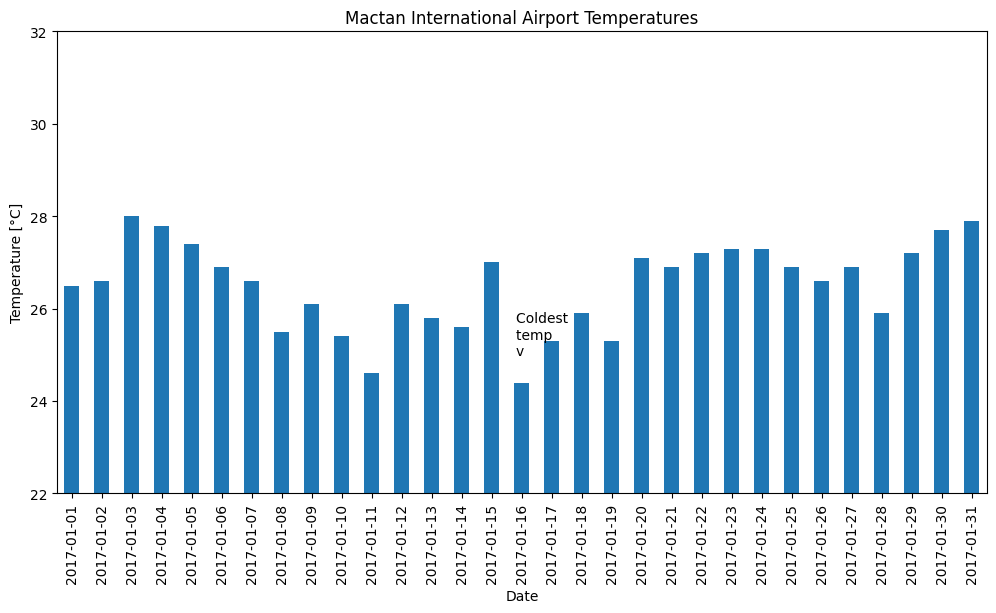

In [ ]:
# Create bar plot
ax = jan2017_temps.plot(
    kind="bar",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    ylim=[22, 32],
)

# Add plot text
ax.text(14.8, 25, "Coldest \ntemp \nv")

# Let's modify the x-axis labels to be more readable
# using an advanced technique called "list comprehension" (https://www.w3schools.com/python/python_lists_comprehension.asp)
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in jan2017_temps.index]); # based on https://stackoverflow.com/a/63900237

You can find more about how to format bar charts on the [pandas documentation website](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

## Saving your plots as image files

Saving plots created using pandas can be done in several ways. The recommendation for use outside of Jupyter notebooks is to use Matplotlib's `plt.savefig()` function. When using `plt.savefig()`, you simply give a list of commands to generate a plot and include `plt.savefig()` with some parameters as the last command in the Python cell. The file name is required, and the image format will be determined based on the listed file extension. Note that because we have not used Matplotlib for any of the earlier plots, we need to import it here first.

Matplotlib plots can be saved in a number of useful file formats, including PNG, PDF, and EPS. PNG is a nice format for raster images, and EPS is probably easiest to use for vector graphics. Let's check out an example and save our lovely bar plot.

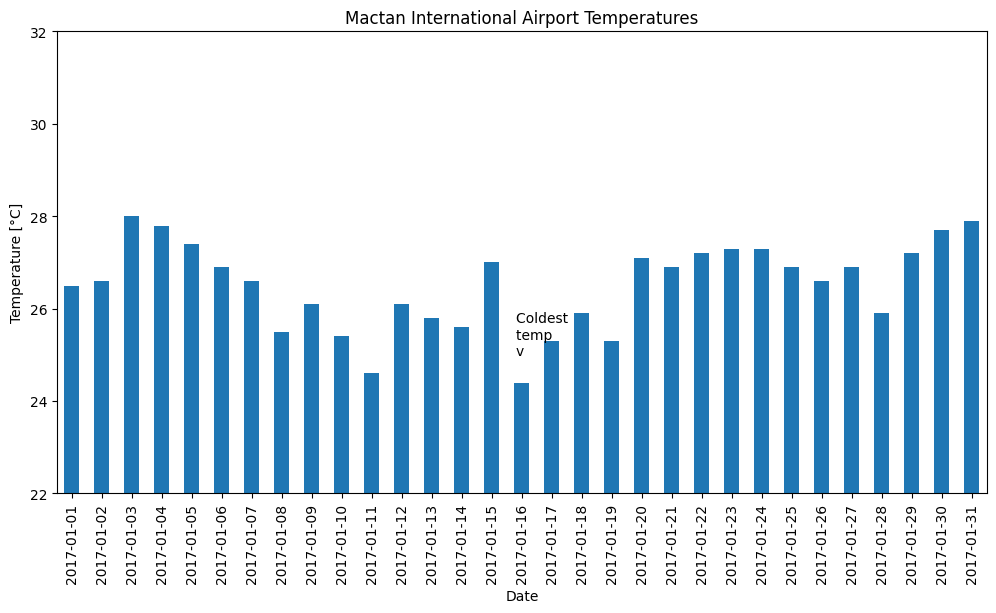

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create bar plot
ax = jan2017_temps.plot(
    kind="bar",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    ylim=[22, 32],
)

# Add plot text
ax.text(14.8, 25, "Coldest \ntemp \nv")

# Let's modify the x-axis labels to be more readable
# using an advanced technique called "list comprehension" (https://www.w3schools.com/python/python_lists_comprehension.asp)
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in jan2017_temps.index]); # based on https://stackoverflow.com/a/63900237

# Save plot to file
plt.savefig("bar-plot.png")

If you refresh your **Files** tab on the left side of the JupyterLab window you should now see `bar-plot.png` listed.
We could try to save another version in higher resolution with a minor change to our plot commands above.

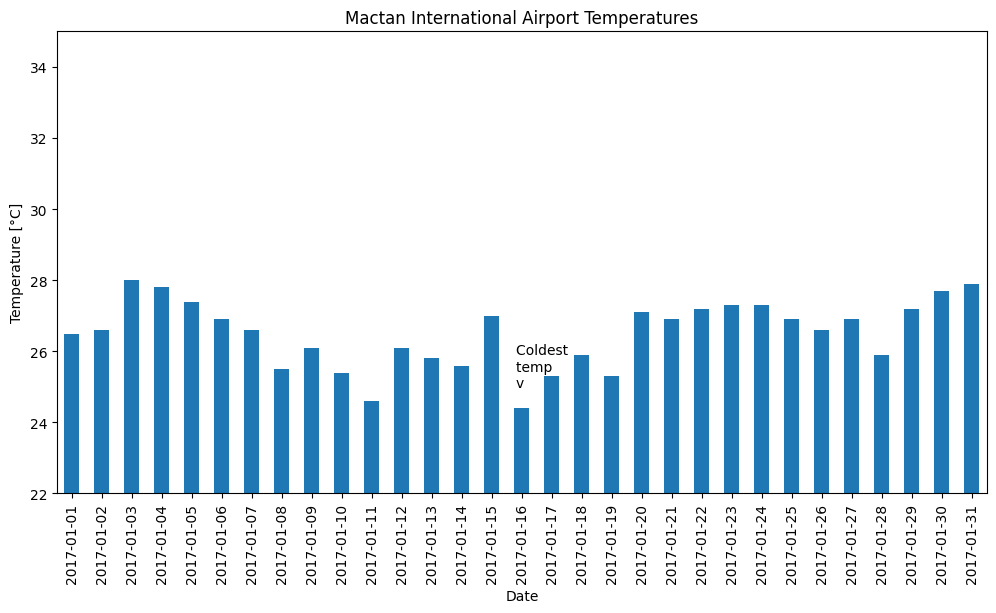

In [ ]:
# Create bar plot
ax = jan2017_temps.plot(
    kind="bar",
    title="Mactan International Airport Temperatures",
    xlabel="Date",
    ylabel="Temperature [°C]",
    figsize=(12, 6),
    ylim=[22, 35],
)

# Add plot text
ax.text(14.8, 25, "Coldest \ntemp \nv")

# Let's modify the x-axis labels to be more readable
# using an advanced technique called "list comprehension" (https://www.w3schools.com/python/python_lists_comprehension.asp)
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in jan2017_temps.index]); # based on https://stackoverflow.com/a/63900237

# Save plot to file (PDF)
# bbox_inches='tight' fits the figure to the specified figsize (which is in inches)
plt.savefig("bar-plot-hi-res.pdf", bbox_inches='tight', dpi=600)

## Interactive plotting with Bokeh (optional, works in Google Colab)

One of the cool things in Jupyter notebooks is that our plots need not be static. We can easily create plots that are interactive, allowing us to view data values by mousing over them, or click to enable/disable plotting of some data. There are several ways we can do this, but let's use Bokeh [Bokeh](https://docs.bokeh.org/en/latest/index.html).

To get started, we need to import Bokeh and configure our notebook to use it for plotting out Pandas data.

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from datetime import timedelta
output_notebook()

In the cell above, we import functions from Bokeh and datetime.

Now, we can consider an example plot similar to the one we started with, but with all the data.

In [ ]:
p = figure(width=800, height=500, x_axis_type="datetime",
           title="Mactan International Airport Temperatures")

p.vbar(x=data.index,
       bottom=data["MIN"],
       top=data["MAX"],
       color='blue', width=timedelta(days=1),
       alpha=0.5, legend_label='bar')

p.line(x=data.index,
       y=data["TEMP"],
       color='red', alpha=0.5, legend_label='line')

p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Temperature'

p.legend.click_policy='hide'
show(p)



In the example below, we plot only the data from the `jan2017_temps` pandas Series.


In [ ]:
p = figure(width=800, height=300, x_axis_type="datetime",
           title="Mactan International Airport Temperatures")

p.vbar(x=jan2017_temps.index,
       bottom=20,
       top=jan2017_temps, color='blue',
       width=timedelta(days=0.5),
       alpha=0.5, legend_label='line')

p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Temperature'

p.legend.click_policy='hide'
show(p)